# User Overview Analysis


### Preliminary Tasks
* Start by identifying the top 10 handsets used by the customers
* Then, identify the top  handset manufacturer
* Next, identify the top 5 handsets per top 3 handset manufacturer
* Make a short interpretation and recommendation to marketing teams

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import pickle

sys.path.append("../scripts/")

from utils import Utils
from clean_data import DataCleaner
from plot import Plotter

In [2]:
# Load data
df = Utils().load_data("../data/Week1_challenge_data_source(CSV).csv")


In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [5]:
df = DataCleaner().drop_duplicate(df)
df = DataCleaner().remove_whitespace_column(df)
# df = DataCleaner().convert_to_datetime(df)
# df = DataCleaner().convert_to_string(df)
# df = DataCleaner().fill_missing_values_numeric(df, "median")
# df.dropna(inplace=True, axis=0)

### Identify top 10 handset types

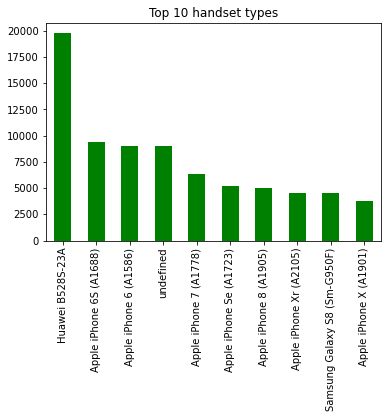

In [6]:
df['handset_type'].value_counts()[:10].plot(kind='bar', color='green', title="Top 10 handset types")
top_ten_handset = df['handset_type'].value_counts()[:10].index.to_list()

### Identify top 3 handset manufacturers

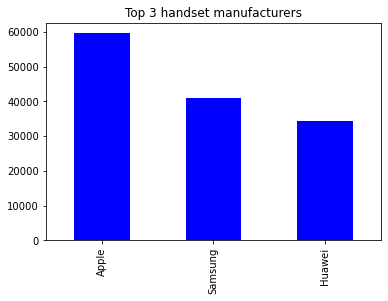

In [7]:
df['handset_manufacturer'].value_counts()[:3].plot(kind='bar', color='blue', title="Top 3 handset manufacturers")
top_three_handset_manufacturer = df['handset_manufacturer'].value_counts()[:3].index.to_list()

### Identify top 5 handsets per top 3 handset manufacturers

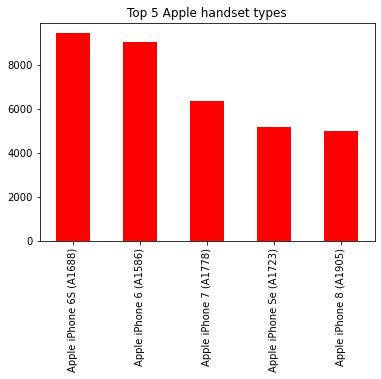

In [8]:
manu = df.groupby('handset_manufacturer')
manu.get_group('Apple')['handset_type'].value_counts()[:5].plot(kind='bar', color='red', title="Top 5 Apple handset types")
top_five_apple_handset_type = manu.get_group('Apple')['handset_type'].value_counts()[:5].index.to_list()

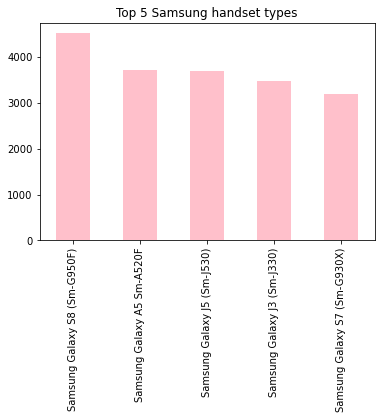

In [9]:
manu.get_group('Samsung')['handset_type'].value_counts()[:5].plot(kind='bar', color='pink', title="Top 5 Samsung handset types")
top_five_samsung_handset_type = manu.get_group('Samsung')['handset_type'].value_counts()[:5].index.to_list()

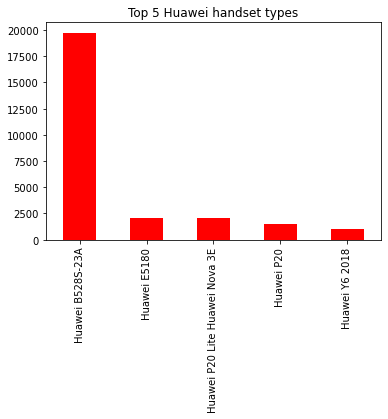

In [10]:
manu.get_group('Huawei')['handset_type'].value_counts()[:5].plot(kind='bar', color='red', title="Top 5 Huawei handset types")
top_five_huawei_handset_type = manu.get_group('Huawei')['handset_type'].value_counts()[:5].index.to_list()

The marketing team should target services tailored to Samsung, Huawei and Apple devices. From the above analysis we can see that the three brands contain the majority of the market. It is also evident that Huawei B5285S-23A is the most commonly used handset.

### Task 1.1 Aggregate per user the following information in the column
        * number of xDR sessions
        * Session duration
        * the total download(DL) and upload(UL) data
        * the total data volume (in Bytes) during this session for each application

To analyze the data I observed data for columns that could represent uniquely a single user. Two columns come in mind when considering and those are the MSISDN/Number column and the IMSI. MSISDN(Mobile Station Integrated Services Digital Network) is the number which is used to communicate by users. It is the number that we commonly text and call. This number is a label and can be mapped to different SIM cards as mentioned [here](https://medium.com/geekculture/msisdn-vs-imsi-whats-the-difference-and-why-does-it-matter-for-mobile-identity-c6f7787e33b3). The IMSI(International Mobile Subscriber Identity) is a unique identifier for a SIM card. For our usecase I chose the MSISDN column to identify a user because a single user usually has a single number and in cases when they lose their phone, they usually tend to get their original number.

In [11]:
# Number of unique MSISDNs
print(f"The number of unique MSISDNs is {len(df['msisdn/number'].unique())}")

The number of unique MSISDNs is 106857


#### Number of xDR sessions

In [12]:
sessions = df.groupby('msisdn/number').agg({'bearer_id': 'count'})
sessions = sessions.rename(columns={'bearer_id': 'xDR_sessions'})
sessions.sort_values(by=['xDR_sessions'], ascending = False).head(10)

,xDR_sessions
msisdn/number,
3.362632e+10,18
3.362578e+10,17
3.361489e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.376041e+10,12
3.360452e+10,12


In [13]:
sessions.describe()

,xDR_sessions
count,106856.000000
mean,1.389777
std,0.809863
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,18.000000


We can see from the results above on average each user has 1.389 xDR sessions

#### Session duration

In [14]:
df[['dur._(ms).1','dur._(ms)']]

,dur._(ms).1,dur._(ms)
0,1.823653e+09,1823652.0
1,1.365104e+09,1365104.0
2,1.361763e+09,1361762.0
3,1.321510e+09,1321509.0
4,1.089009e+09,1089009.0
...,...,...
149996,8.123076e+07,81230.0
149997,9.797070e+07,97970.0
149998,9.824953e+07,98249.0
149999,9.791063e+07,97910.0


There are two duration columns but the columns dur._(ms) seems the correct representation of the duration in milliseconds. I have chosen this column to identify the session duration

In [15]:
durations = df.groupby('msisdn/number').agg({'dur._(ms)': 'sum'})
durations=durations.rename(columns= {'dur._(ms)': 'total_duration(ms)'})
durations.sort_values(by=['total_duration(ms)'], ascending = False).head(10)

,total_duration(ms)
msisdn/number,
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366284e+10,6614270.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0
3.366746e+10,5649882.0


In [16]:
durations.describe()

,total_duration(ms)
count,1.068560e+05
mean,1.461672e+05
std,1.863587e+05
min,7.142000e+03
25%,7.130800e+04
50%,1.027400e+05
75%,1.727990e+05
max,1.855375e+07


From the above result we can see that the average session duration is about 146 seconds.

#### The total download(DL) and upload(UL) data

In [17]:
df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',


In [18]:
total_data_df = df[['msisdn/number', 'total_ul_(bytes)', 'total_dl_(bytes)']]
total_data = total_data_df.groupby('msisdn/number').sum()
total_data[['total_ul_(MB)', 'total_dl_(MB)']] = total_data[['total_ul_(bytes)', 'total_dl_(bytes)']].div(1024**2)
total_data.head()

,total_ul_(bytes),total_dl_(bytes),total_ul_(MB),total_dl_(MB)
msisdn/number,,,,
3.360100e+10,36053108.0,8.426375e+08,34.382923,803.601709
3.360100e+10,36104459.0,1.207552e+08,34.431895,115.161118
3.360100e+10,39306820.0,5.566597e+08,37.485905,530.872024
3.360101e+10,20327526.0,4.019932e+08,19.385839,383.370564
3.360101e+10,94280527.0,1.363130e+09,89.912917,1299.982469


In [19]:
total_data.describe()

,total_ul_(bytes),total_dl_(bytes),total_ul_(MB),total_dl_(MB)
count,1.068560e+05,1.068560e+05,106856.000000,106856.000000
mean,5.730942e+07,6.336527e+08,54.654524,604.298287
std,3.565765e+07,4.645551e+08,34.005785,443.034226
min,2.866892e+06,8.827082e+06,2.734081,8.418161
25%,3.639547e+07,3.148271e+08,34.709430,300.242485
50%,4.679387e+07,5.703677e+08,44.626108,543.945048
75%,6.573199e+07,8.073645e+08,62.686913,769.962778
max,7.295774e+08,8.156743e+09,695.779209,7778.876775


From the results above the average data downloaded by a user is about 604MB and the average data uploaded by a user is 54.65MB.

#### The total data volume (in Bytes) during this session for each application

In [20]:
df["social_media"] = df["social_media_dl_(bytes)"] + df['social_media_ul_(bytes)']
df["google"] = df["google_dl_(bytes)"] + df["google_ul_(bytes)"]
df['email'] = df["email_dl_(bytes)"] + df["email_ul_(bytes)"]
df['youtube'] = df["youtube_dl_(bytes)"] + df["youtube_ul_(bytes)"]
df['netflix'] = df["netflix_dl_(bytes)"] + df["netflix_ul_(bytes)"]
df["gaming"] = df["gaming_dl_(bytes)"] + df["gaming_ul_(bytes)"]
df['other']= df["other_dl_(bytes)"]+ df["other_ul_(bytes)"]
df['total_data'] = df['total_dl_(bytes)'] + df['total_ul_(bytes)']

In [21]:
app_total_data = df[['msisdn/number', 'social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other', 'total_data']].copy()
app_total_data.groupby('msisdn/number').sum()

,social_media,google,email,youtube,netflix,gaming,other,total_data
msisdn/number,,,,,,,,
3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0,8.786906e+08
3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0,1.568596e+08
3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0,5.959665e+08
3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0,4.223207e+08
3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0,1.457411e+09
...,...,...,...,...,...,...,...,...
3.379000e+10,300183.0,7531269.0,1006915.0,26647843.0,14902538.0,6.603614e+08,295282817.0,7.146416e+08
3.379000e+10,498569.0,5429705.0,2514097.0,19851572.0,8531060.0,4.370033e+08,211115113.0,4.803073e+08
3.197021e+12,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,1.780487e+08,470526473.0,2.321240e+08


In [22]:
app_total_data.describe()

,msisdn/number,social_media,google,email,youtube,netflix,gaming,other,total_data
count,1.489350e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05
mean,4.188282e+10,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08,4.293653e+08,4.957646e+08
std,2.447443e+12,1.035646e+06,3.516420e+06,1.071109e+06,9.246800e+06,9.260820e+06,2.440199e+08,2.432681e+08,2.443818e+08
min,3.360100e+10,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05,2.895611e+07
25%,3.365130e+10,9.322180e+05,4.943599e+06,1.359344e+06,1.599846e+07,1.597946e+07,2.187279e+08,2.185534e+08,2.844759e+08
50%,3.366371e+10,1.826471e+06,7.812835e+06,2.263567e+06,2.266177e+07,2.263554e+07,4.316150e+08,4.299865e+08,4.968611e+08
75%,3.368349e+10,2.727487e+06,1.068280e+07,3.159818e+06,2.929260e+07,2.929044e+07,6.414159e+08,6.399275e+08,7.065059e+08
max,8.823971e+14,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08,9.559848e+08


#### Task 1.2 

For further analysis some of the columns are selected. These columns apply to our usecase and that is the basis for the selection.

In [23]:
explore_feature_df = df[['msisdn/number', 'last_location_name',
                                 'handset_manufacturer', 'handset_type', 'dur._(ms)', 
                                 'social_media', 'google', 'email', 'youtube', 'netflix',
                                 'gaming','other', 'total_data'
                                ]]
explore_feature_df = explore_feature_df.rename(columns={'other':'other_data','msisdn/number': 'msisdn', 'last_location_name': 'location','dur._(ms)': 'duration_ms' })



In [24]:
explore_feature_df.head()

,msisdn,location,handset_manufacturer,handset_type,duration_ms,social_media,google,email,youtube,netflix,gaming,other_data,total_data
0,3.366496e+10,9.16456699548519E+015,Samsung,Samsung Galaxy A5 Sm-A520F,1823652.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,3.368185e+10,L77566A,Samsung,Samsung Galaxy J5 (Sm-J530),1365104.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,3.376063e+10,D42335A,Samsung,Samsung Galaxy A8 (2018),1361762.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,3.375034e+10,T21824A,undefined,undefined,1321509.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,3.369980e+10,D88865A,Samsung,Samsung Sm-G390F,1089009.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


#### Non-graphical Univariate Analysis

In [25]:
quantitative_df = explore_feature_df[['duration_ms', 'social_media', 'google', 'email', 'youtube', 'netflix',
                                 'gaming', 'total_data', 'other_data' ]]
quantitative_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
duration_ms,150000.0,1.046086e+05,8.103762e+04,7142.0,57440.5,86399.0,1.324302e+05,1859336.0
social_media,150001.0,1.828250e+06,1.035646e+06,1563.0,932218.0,1826471.0,2.727487e+06,3650861.0
google,150001.0,7.807295e+06,3.516420e+06,40330.0,4943599.0,7812835.0,1.068280e+07,15528782.0
email,150001.0,2.259102e+06,1.071109e+06,8359.0,1359344.0,2263567.0,3.159818e+06,4518036.0
youtube,150001.0,2.264348e+07,9.246800e+06,78903.0,15998463.0,22661770.0,2.929260e+07,45190078.0
netflix,150001.0,2.262861e+07,9.260820e+06,98432.0,15979455.0,22635545.0,2.929044e+07,45198153.0
gaming,150001.0,4.303331e+08,2.440199e+08,306358.0,218727939.0,431614977.0,6.414159e+08,859202784.0
total_data,150000.0,4.957646e+08,2.443818e+08,28956107.0,284475924.0,496861101.5,7.065059e+08,955984776.0
other_data,150001.0,4.293653e+08,2.432681e+08,149045.0,218553417.0,429986492.0,6.399275e+08,859520934.0


#### Graphical Univariate Analysis

The following are a few plots of the distributions of individual applicatations

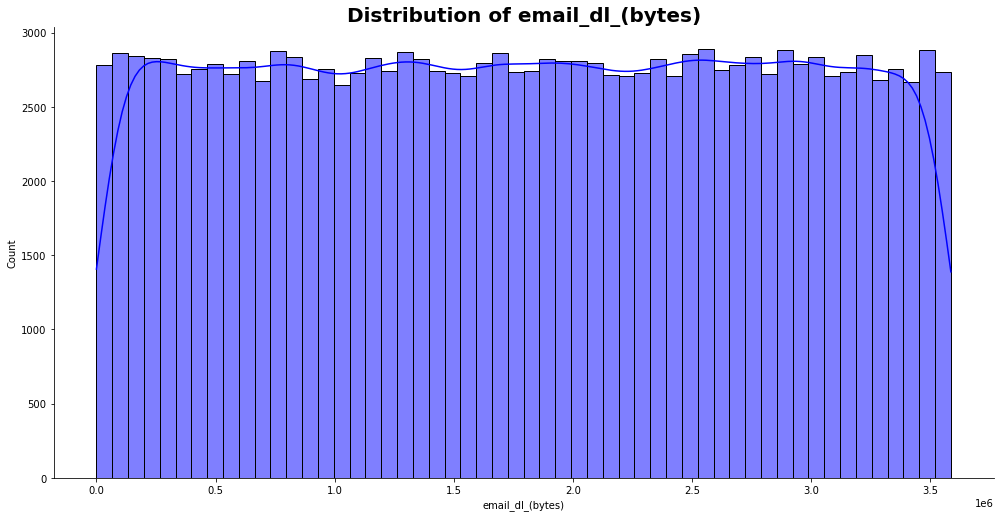

In [26]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_columns]
Plotter.plot_hist(numeric_df, 'email_dl_(bytes)','blue')


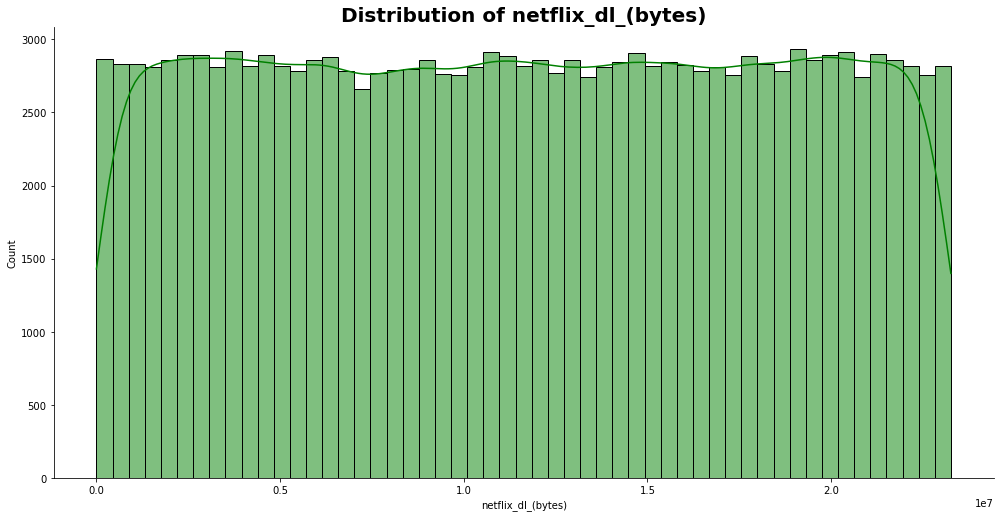

In [27]:
Plotter.plot_hist(numeric_df, 'netflix_dl_(bytes)','green')

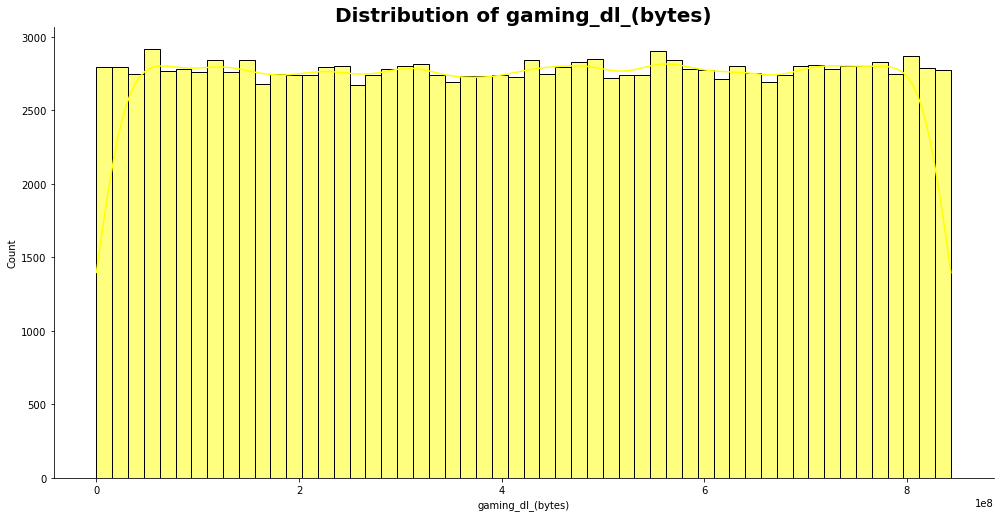

In [28]:
Plotter.plot_hist(numeric_df, 'gaming_dl_(bytes)','yellow')


We can see from the above plots the distribution is symmetric. We can see the data is centered and there aren't much outliers within the data. We can confirm the above by using box plots. 

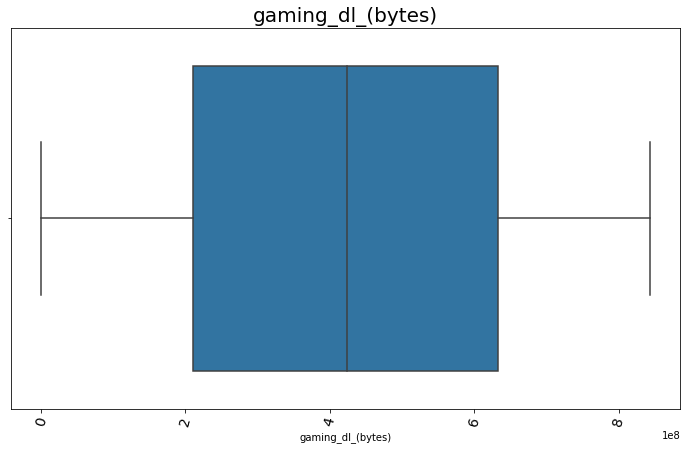

In [29]:
Plotter.plot_box(numeric_df, 'gaming_dl_(bytes)','gaming_dl_(bytes)')

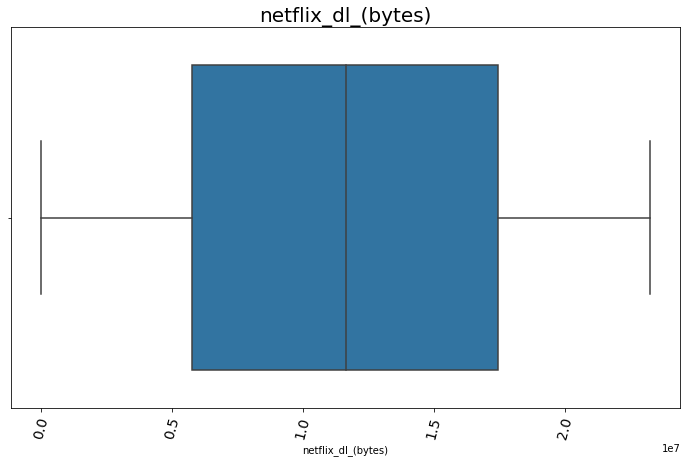

In [30]:
Plotter.plot_box(numeric_df, 'netflix_dl_(bytes)','netflix_dl_(bytes)')

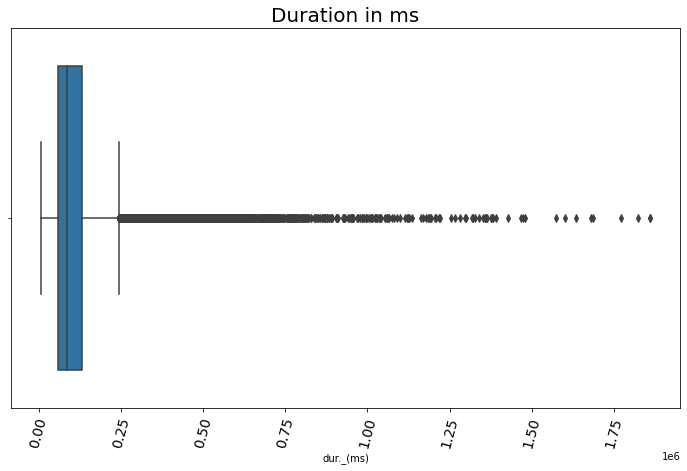

In [31]:
Plotter.plot_box(numeric_df, 'dur._(ms)','Duration in ms')

The above plot signifies the presence of outliers within the duration column.

#### Bivariate Analysis


In [32]:
total_data = explore_feature_df[['msisdn', 'social_media', 'google', 'email', 'youtube', 'netflix',
                                 'gaming',  'other_data', 'total_data', 'handset_manufacturer']]
total_data_agg = total_data.groupby('msisdn').sum()
total_data_agg


,social_media,google,email,youtube,netflix,gaming,other_data,total_data
msisdn,,,,,,,,
3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0,8.786906e+08
3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0,1.568596e+08
3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0,5.959665e+08
3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0,4.223207e+08
3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0,1.457411e+09
...,...,...,...,...,...,...,...,...
3.379000e+10,300183.0,7531269.0,1006915.0,26647843.0,14902538.0,6.603614e+08,295282817.0,7.146416e+08
3.379000e+10,498569.0,5429705.0,2514097.0,19851572.0,8531060.0,4.370033e+08,211115113.0,4.803073e+08
3.197021e+12,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,1.780487e+08,470526473.0,2.321240e+08


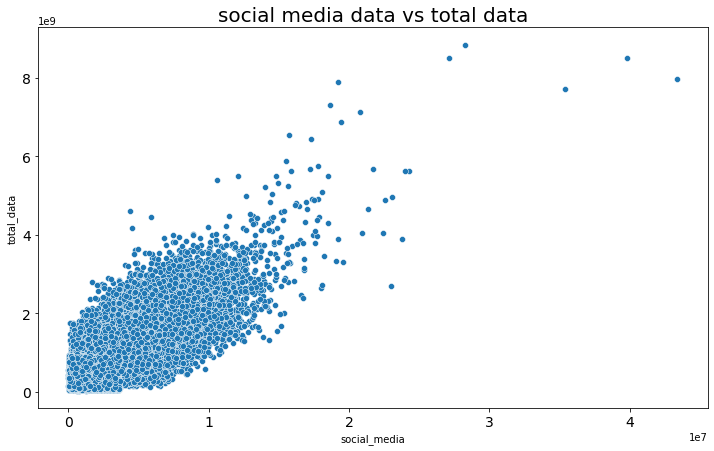

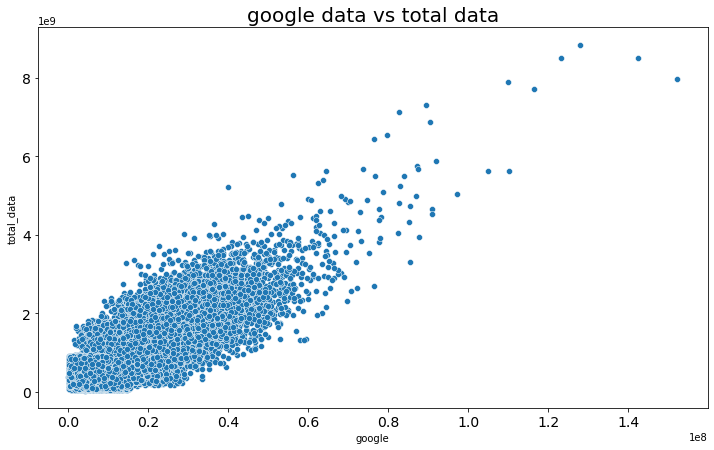

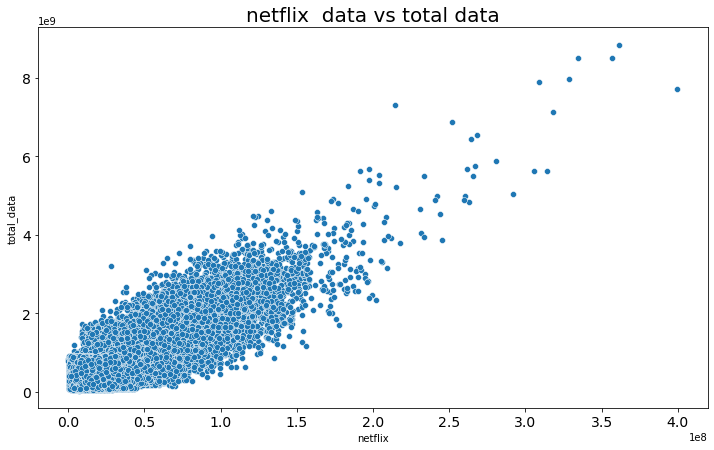

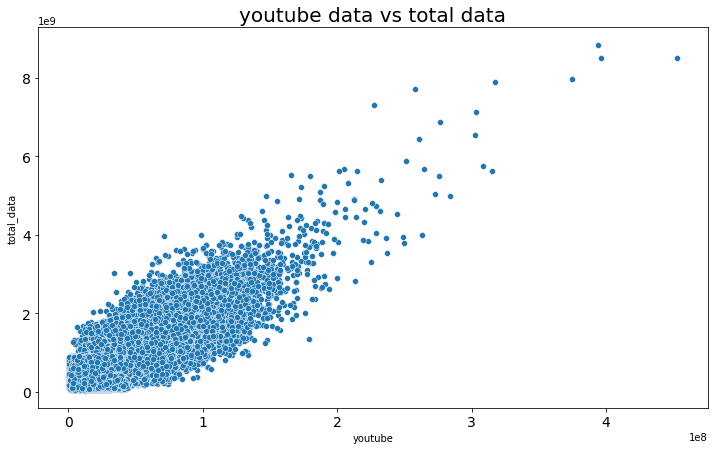

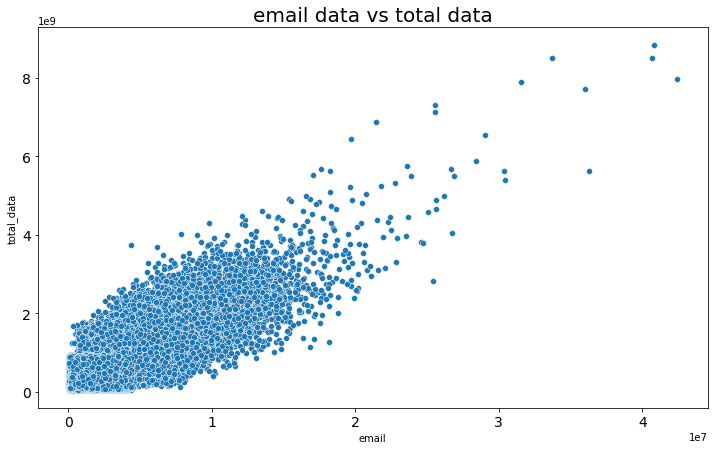

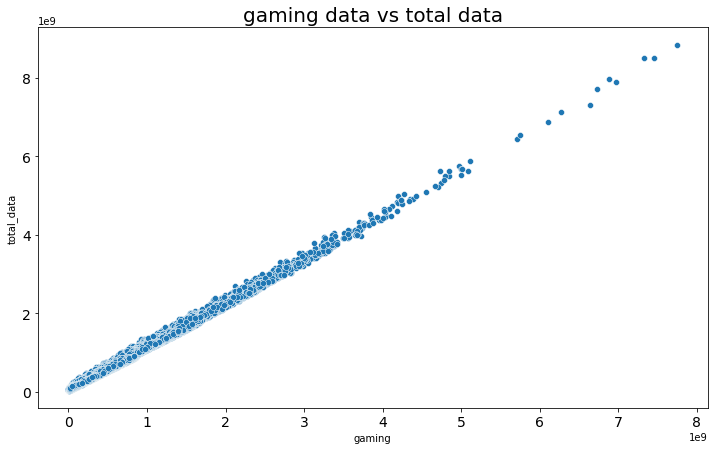

In [33]:
Plotter.plot_scatter(total_data_agg, 'social_media', 'total_data', 'social media data vs total data',  None,  None)

Plotter.plot_scatter(total_data_agg, 'google', 'total_data', 'google data vs total data',  None,  None)

Plotter.plot_scatter(total_data_agg, 'netflix', 'total_data', 'netflix  data vs total data',  None,  None)

Plotter.plot_scatter(total_data_agg, 'youtube', 'total_data', 'youtube data vs total data',  None,  None)
Plotter.plot_scatter(total_data_agg, 'email', 'total_data', 'email data vs total data',  None,  None)
Plotter.plot_scatter(total_data_agg, 'gaming', 'total_data', 'gaming data vs total data',  None,  None)

#### Variable Transformations

In [36]:
from sklearn.preprocessing import MinMaxScaler


scaled_explore_feature_df = explore_feature_df[['msisdn', 'total_data', 'duration_ms']]

scaled_explore_feature_df['duration_ms'] = explore_feature_df['duration_ms']/1000
scaled_explore_feature_df = scaled_explore_feature_df.rename(columns={'duration_ms': 'duration'})

scaled_explore_feature_df_agg = scaled_explore_feature_df.groupby('msisdn').agg({'duration':'sum', 'total_data': 'sum'})

deciles = pd.qcut(scaled_explore_feature_df_agg['duration'], 5, labels=["1st_decile", "2nd_decile",
                                                      "3rd_decile", "4th_decile",
                                                      "5th_decile"])



explore_feature_df_with_decile = scaled_explore_feature_df_agg.copy()

explore_feature_df_with_decile['decile'] = deciles

explore_feature_df_with_decile_agg = explore_feature_df_with_decile.groupby('decile').agg({'total_data': 'sum',
                                                                                           'duration': 'sum'})
explore_feature_df_with_decile_agg




/tmp/ipykernel_138874/1152425606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_explore_feature_df['duration_ms'] = explore_feature_df['duration_ms']/1000


,total_data,duration
decile,,
1st_decile,1.154869e+13,644345.106
2nd_decile,1.257064e+13,1807896.025
3rd_decile,1.156998e+13,2124982.922
4th_decile,1.397471e+13,3448609.656
5th_decile,2.416942e+13,7593003.947


<Figure size 720x504 with 0 Axes>

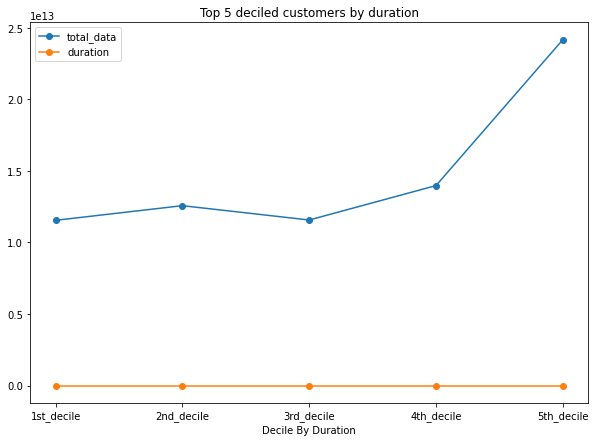

In [37]:
plt.figure(figsize=(10,7))
explore_feature_df_with_decile_agg.plot(linestyle='-', marker='o', figsize=(10,7), title='Top 5 deciled customers by duration').set_xlabel("Decile By Duration")
plt.xticks(np.arange(len(explore_feature_df_with_decile_agg.index)), explore_feature_df_with_decile_agg.index)

plt.show()

From the above plot we can see that there is direct relationship between data_volume and duration. There is also a sharp increase in total volume after the 4th decile

#### Correlation

In [40]:
total_data = explore_feature_df[['social_media', 'google', 'email', 'youtube', 'netflix',
                                 'gaming',  'other_data']]

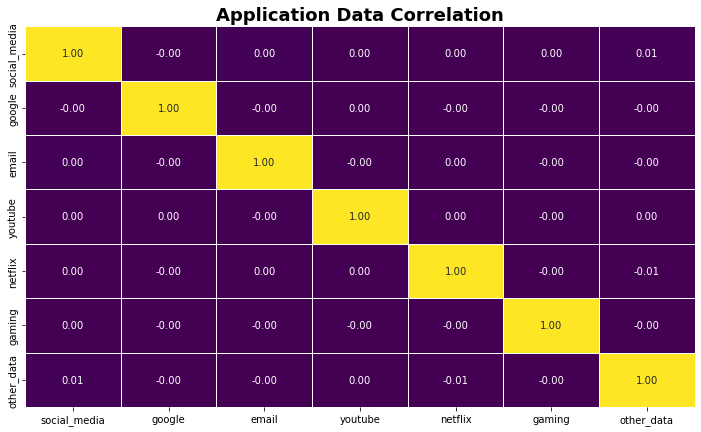

,social_media,google,email,youtube,netflix,gaming,other_data
social_media,1.000000,-0.001708,0.004032,0.000548,0.001013,0.001082,0.006065
google,-0.001708,1.000000,-0.000412,0.002277,-0.001902,-0.000994,-0.001727
email,0.004032,-0.000412,1.000000,-0.002919,0.001029,-0.000644,-0.001299
youtube,0.000548,0.002277,-0.002919,1.000000,0.002882,-0.002999,0.002969
netflix,0.001013,-0.001902,0.001029,0.002882,1.000000,-0.003109,-0.009033
gaming,0.001082,-0.000994,-0.000644,-0.002999,-0.003109,1.000000,-0.002661
other_data,0.006065,-0.001727,-0.001299,0.002969,-0.009033,-0.002661,1.000000


In [41]:
data_correlation = total_data.corr()
Plotter.plot_heatmap(data_correlation, 'Application Data Correlation')
data_correlation


In [12]:
agg_data = {}
agg_data['top_ten_handset'] = top_ten_handset
agg_data['top_three_handset_manufacturer'] = top_three_handset_manufacturer
agg_data['top_five_apple_handset_type'] = top_five_apple_handset_type
agg_data['top_five_samsung_handset_type'] = top_five_samsung_handset_type
agg_data['top_five_huawei_handset_type'] = top_five_huawei_handset_type

pickle.dump(agg_data, open('../data/overview_data.pkl', 'wb'))